In [581]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import std

# Set the figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold

%matplotlib inline

In [582]:
df = pd.read_csv('train.csv', index_col=0, parse_dates=True)
dftest = pd.read_csv('test.csv', index_col=0, parse_dates=True)
df.head(50)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [583]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [584]:
dftest.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [585]:
df['hour']=df.index.hour
df['month']=df.index.month
df['dayofweek']=df.index.dayofweek

dftest['hour']=dftest.index.hour
dftest['month']=dftest.index.month
dftest['dayofweek']=dftest.index.dayofweek

#df['hour']=df[index].hour

In [586]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,dayofweek
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5


In [587]:
dftest.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,dayofweek
datetime,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,1,3
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,1,3
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,1,3
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1,3
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,1,3


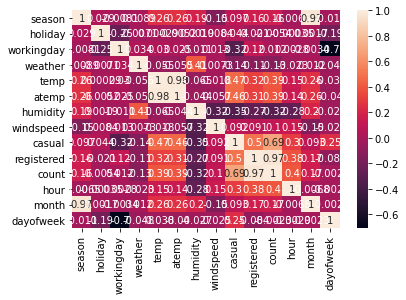

In [588]:
sns.heatmap(df.corr(), annot=True)

In [589]:
#X = df[['season', 'workingday', 'weather', 'windspeed', 'hour', 'month', 'dayofweek','temp']]
XPREDICT = dftest[['dayofweek','temp', 'month', 'weather', 'hour', 'windspeed', 'workingday', 'season']]

In [590]:
X = df[['dayofweek','temp', 'month', 'weather', 'hour', 'windspeed', 'workingday', 'season']]

In [591]:
X.head()

,dayofweek,temp,month,weather,hour,windspeed,workingday,season
datetime,,,,,,,,
2011-01-01 00:00:00,5,9.84,1,1,0,0.0,0,1
2011-01-01 01:00:00,5,9.02,1,1,1,0.0,0,1
2011-01-01 02:00:00,5,9.02,1,1,2,0.0,0,1
2011-01-01 03:00:00,5,9.84,1,1,3,0.0,0,1
2011-01-01 04:00:00,5,9.84,1,1,4,0.0,0,1


In [592]:
XPREDICT.head()

,dayofweek,temp,month,weather,hour,windspeed,workingday,season
datetime,,,,,,,,
2011-01-20 00:00:00,3,10.66,1,1,0,26.0027,1,1
2011-01-20 01:00:00,3,10.66,1,1,1,0.0000,1,1
2011-01-20 02:00:00,3,10.66,1,1,2,0.0000,1,1
2011-01-20 03:00:00,3,10.66,1,1,3,11.0014,1,1
2011-01-20 04:00:00,3,10.66,1,1,4,11.0014,1,1


In [593]:
y1 = df['casual']                # we will predict casual and registered rentals separately
y2 = df['registered']

In [594]:
#y1 = df['count']

### Train - Test Split

In [1]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [596]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42) # note: X1_train = X2_train, and X1_test = X2_test

In [597]:
X1_train.describe()

,dayofweek,temp,month,weather,hour,windspeed,workingday,season
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,3.019063,20.269104,6.525264,1.416743,11.547772,12.795542,0.680983,2.507694
std,1.999737,7.788428,3.434726,0.634073,6.922209,8.200255,0.466122,1.115295
min,0.000000,0.820000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,13.940000,4.000000,1.000000,6.000000,7.001500,0.000000,2.000000
50%,3.000000,20.500000,7.000000,1.000000,12.000000,12.998000,1.000000,3.000000
75%,5.000000,26.240000,10.000000,2.000000,18.000000,16.997900,1.000000,4.000000
max,6.000000,41.000000,12.000000,4.000000,23.000000,56.996900,1.000000,4.000000


In [598]:
X1_test.describe()

,dayofweek,temp,month,weather,hour,windspeed,workingday,season
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
mean,2.993572,20.077952,6.506428,1.425161,11.516988,12.814802,0.680441,2.502296
std,2.024189,7.804137,3.483435,0.633000,6.891837,8.021983,0.466413,1.119930
min,0.000000,0.820000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,13.940000,3.000000,1.000000,6.000000,7.001500,0.000000,1.000000
50%,3.000000,20.500000,7.000000,1.000000,12.000000,12.998000,1.000000,3.000000
75%,5.000000,26.240000,10.000000,2.000000,17.750000,16.997900,1.000000,4.000000
max,6.000000,39.360000,12.000000,3.000000,23.000000,46.002200,1.000000,4.000000


In [599]:
data1 = X1_train.join(pd.Series(y1_train, name='casual'))

In [600]:
data2 = X2_train.join(pd.Series(y2_train, name='registered'))

In [601]:
#scaler = MinMaxScaler()
#X1_train = scaler.fit_transform(X1_train)
#X1_test = scaler.transform(X1_test)
#X2_train = scaler.fit_transform(X2_train)
#X2_test = scaler.transform(X2_test)
#XPREDICT = scaler.transform(XPREDICT)

In [602]:
# check variance inflation factor:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

In [603]:
X_vif = add_constant(X1_train)

pd.Series([variance_inflation_factor(X_vif.values, i) 
            for i in range(X_vif.shape[1])], 
            index=X_vif.columns)

const         38.927958
dayofweek      1.989687
temp           1.101037
month         17.977241
weather        1.006896
hour           1.046861
windspeed      1.046171
workingday     1.984654
season        17.978412
dtype: float64

In [604]:
data1.head()

,dayofweek,temp,month,weather,hour,windspeed,workingday,season,casual
datetime,,,,,,,,,
2011-07-06 05:00:00,2,27.88,7,1,5,6.0032,1,3,5
2012-08-04 16:00:00,5,36.90,8,1,16,19.9995,0,3,197
2012-07-11 15:00:00,2,32.80,7,1,15,16.9979,1,3,56
2011-04-10 04:00:00,6,14.76,4,2,4,7.0015,0,2,3
2011-11-19 10:00:00,5,13.12,11,1,10,16.9979,0,4,35


In [605]:
data2.head()

,dayofweek,temp,month,weather,hour,windspeed,workingday,season,registered
datetime,,,,,,,,,
2011-07-06 05:00:00,2,27.88,7,1,5,6.0032,1,3,30
2012-08-04 16:00:00,5,36.90,8,1,16,19.9995,0,3,253
2012-07-11 15:00:00,2,32.80,7,1,15,16.9979,1,3,220
2011-04-10 04:00:00,6,14.76,4,2,4,7.0015,0,2,2
2011-11-19 10:00:00,5,13.12,11,1,10,16.9979,0,4,165


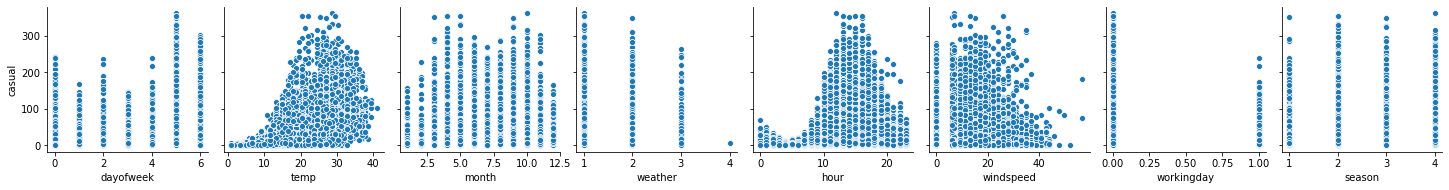

In [606]:
sns.pairplot(data1, x_vars=X.columns, y_vars=['casual'])

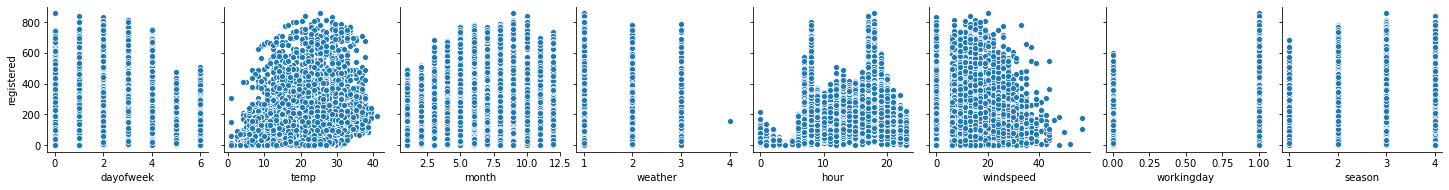

In [607]:
sns.pairplot(data2, x_vars=X.columns, y_vars=['registered'])

In [608]:
# sns.lmplot(x='windspeed', y='casual', data = data1)

In [609]:
transformer = ColumnTransformer([

    ('onehotday', OneHotEncoder(sparse=False, drop='first', handle_unknown='error'), ['dayofweek']),     
    ('onehotmonth', OneHotEncoder(sparse=False, drop='first', handle_unknown='error'), ['month']),     
    ('weather', OneHotEncoder(sparse=False, drop='first', handle_unknown='error'), ['weather']),
    ('workingday', OneHotEncoder(sparse=False, drop='first', handle_unknown='error'), ['workingday']),    
    ('polynomialhour', PolynomialFeatures(degree=4, include_bias=False), ['hour']),
    ('windspeednothing', 'passthrough', ['windspeed']),    
    ('season', OneHotEncoder(sparse=False, drop='first', handle_unknown='error'), ['season']),            
#    ('polynomialmonth', PolynomialFeatures(degree=8, include_bias=False), ['month']),    
#    ('do_nothing1', 'passthrough', ['temp']),
#    ('polynomialwindspeed', PolynomialFeatures(degree=4, include_bias=False), ['windspeed']),
#    ('hournothing', 'passthrough', ['hour']),
])

In [610]:
#polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=True)

#linear_regression = LinearRegression()
#pipeline = Pipeline([('feature_engineering', transformer),   
#                     ('linear_regression', linear_regression)])
#pipeline.fit(X1_train, y1_train)

In [611]:
# print(f' The R^2 of the training data 1 (casual rentals) is {round(pipeline.score(X1_train, y1_train), 2)}')

In [612]:
#linear_regression = LinearRegression()
#pipeline = Pipeline([('feature_engineering', transformer),   
#                     ("linear_regression", linear_regression)])
#pipeline.fit(X2_train, y2_train)
#X2trans = transformer.transform(X2_train)

In [613]:
transformer.fit(X1_train)
X1trans = transformer.transform(X1_train)

In [614]:
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X1trans, np.log(y1_train+1))            # use log to avoid receiving negative values!

LinearRegression()

In [615]:
gradientboost1 = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(gradientboost1, X1trans, y1_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

gradientboost1 = GradientBoostingRegressor(learning_rate=0.2, n_estimators=150, max_depth=5)

gradientboost1.fit(X1trans, np.log(y1_train+1))

MAE: -15.684 (0.777)


GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=150)

In [616]:
lin_reg_1.score(X1trans, np.log(y1_train + 1))

0.7759813350592499

In [617]:
round(gradientboost1.score(X1trans, np.log(y1_train+1)), 3)            # training accuracy, random forest, casual rentals

0.902

In [618]:
cross_val_result = cross_val_score(lin_reg_1, X1trans, y1_train)

In [619]:
cross_val_result               # train scores 1

array([0.51403541, 0.53433976, 0.55003193, 0.54486085, 0.53733198])

In [620]:
#cross_val_result2 = cross_val_score(randomforest1, X1trans, y1_train)

In [621]:
X1trans_test = transformer.transform(X1_test)

In [622]:
round(lin_reg_1.score(X1trans_test, np.log(y1_test+1)), 3)  # --> test accuracy for casual rentals

0.776

In [623]:
round(gradientboost1.score(X1trans_test, np.log(y1_test+1)), 3) # --> gradient booster test accuracy for casual rentals

0.85

In [624]:
cross_val_result = cross_val_score(lin_reg_1, X1trans_test, np.log(y1_test + 1))

In [625]:
cross_val_result               # crossvar results for testing data 1 (casual rentals)

array([0.78829706, 0.74746025, 0.75794593, 0.77771433, 0.79178368])

In [626]:
cross_val_result2 = cross_val_score(gradientboost1, X1trans_test, np.log(y1_test + 1))

In [627]:
cross_val_result2               # crossvar results for testing data 1 (casual rentals) - gradient booster

array([0.82538469, 0.79279153, 0.80063935, 0.79438569, 0.82708686])

In [628]:
X2trans = transformer.transform(X2_train)

In [629]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2trans, np.log(y2_train+1))

LinearRegression()

In [630]:
# Alternative Model - Gradient Boosting

gradientboost2 = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(gradientboost2, X1trans, y1_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

gradientboost2 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, max_depth=5)
#randomforest2 = RandomForestClassifier(max_depth=12, n_estimators=100, random_state=166)   # these hyperparameters seem to be beneficial for the accuracy scores
gradientboost2.fit(X2trans, np.log(y2_train+1))

MAE: -15.682 (0.776)


GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [631]:
lin_reg_2.score(X2trans, np.log(y2_train + 1))          # train accuracy for registered rentals

0.6276270267178659

In [632]:
gradientboost2.score(X2trans, np.log(y2_train+1) )          # train accuracy for registered rentals, random forest

0.9361731188964042

In [633]:
cross_val_result2 = cross_val_score(lin_reg_2, X2trans, np.log(y2_train + 1))

In [634]:
cross_val_result2               # crossvar results for training data 2 (registered rentals)

array([0.61975428, 0.64106212, 0.61159655, 0.60028801, 0.64881309])

In [635]:
cross_val_result2B = cross_val_score(gradientboost2, X2trans, np.log(y2_train + 1))

In [636]:
cross_val_result2B               # crossvar results for training data 2 (registered rentals)

array([0.91317848, 0.91578381, 0.90947083, 0.90057956, 0.91919917])

In [637]:
X2trans_test = transformer.transform(X2_test)

In [638]:
round(lin_reg_2.score(X2trans_test, np.log(y2_test + 1)), 3)  # --> test accuracy

0.636

In [639]:
round(gradientboost2.score(X2trans_test, np.log(y2_test + 1)), 3)  # --> test accuracy

0.915

In [640]:
cross_val_result2 = cross_val_score(lin_reg_2, X2trans_test, np.log (y2_test + 1))

In [641]:
cross_val_result2               # crossvar results for testig data 2

array([0.65353605, 0.61013928, 0.64534976, 0.61625809, 0.61055506])

In [642]:
X1_train.describe()

,dayofweek,temp,month,weather,hour,windspeed,workingday,season
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,3.019063,20.269104,6.525264,1.416743,11.547772,12.795542,0.680983,2.507694
std,1.999737,7.788428,3.434726,0.634073,6.922209,8.200255,0.466122,1.115295
min,0.000000,0.820000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,13.940000,4.000000,1.000000,6.000000,7.001500,0.000000,2.000000
50%,3.000000,20.500000,7.000000,1.000000,12.000000,12.998000,1.000000,3.000000
75%,5.000000,26.240000,10.000000,2.000000,18.000000,16.997900,1.000000,4.000000
max,6.000000,41.000000,12.000000,4.000000,23.000000,56.996900,1.000000,4.000000


In [643]:
XPREDICT.describe()

,dayofweek,temp,month,weather,hour,windspeed,workingday,season
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,3.007239,20.620607,6.565070,1.436778,11.555367,12.631157,0.685815,2.493300
std,1.997714,8.059583,3.429462,0.648390,6.912526,8.250151,0.464226,1.091258
min,0.000000,0.820000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,13.940000,4.000000,1.000000,6.000000,7.001500,0.000000,2.000000
50%,3.000000,21.320000,7.000000,1.000000,12.000000,11.001400,1.000000,3.000000
75%,5.000000,27.060000,10.000000,2.000000,18.000000,16.997900,1.000000,3.000000
max,6.000000,40.180000,12.000000,4.000000,23.000000,55.998600,1.000000,4.000000


In [644]:
X1_train.head()

,dayofweek,temp,month,weather,hour,windspeed,workingday,season
datetime,,,,,,,,
2011-07-06 05:00:00,2,27.88,7,1,5,6.0032,1,3
2012-08-04 16:00:00,5,36.90,8,1,16,19.9995,0,3
2012-07-11 15:00:00,2,32.80,7,1,15,16.9979,1,3
2011-04-10 04:00:00,6,14.76,4,2,4,7.0015,0,2
2011-11-19 10:00:00,5,13.12,11,1,10,16.9979,0,4


In [645]:
XPREDICT.head()

,dayofweek,temp,month,weather,hour,windspeed,workingday,season
datetime,,,,,,,,
2011-01-20 00:00:00,3,10.66,1,1,0,26.0027,1,1
2011-01-20 01:00:00,3,10.66,1,1,1,0.0000,1,1
2011-01-20 02:00:00,3,10.66,1,1,2,0.0000,1,1
2011-01-20 03:00:00,3,10.66,1,1,3,11.0014,1,1
2011-01-20 04:00:00,3,10.66,1,1,4,11.0014,1,1


In [646]:
to_predict = transformer.transform(XPREDICT)

In [647]:
linregprediction1 = np.exp(lin_reg_1.predict(to_predict))    # run prediction - lin reg
linregprediction2 = np.exp(lin_reg_2.predict(to_predict))    # run prediction - lin reg

In [648]:
prediction1 = np.exp(gradientboost1.predict(to_predict))    # run prediction - rand forest
prediction2 = np.exp(gradientboost2.predict(to_predict))    # run prediction - rand forest

In [649]:
prediction1

array([1.7351627 , 1.19817934, 1.14433592, ..., 3.38963967, 3.03416902,
       2.18336898])

In [650]:
prediction2

array([15.71846812,  6.84474006,  4.26942094, ..., 71.45493722,
       52.15401897, 27.79275428])

In [651]:
prediction_count=prediction1 + prediction2
linregprediction_count=linregprediction1 + linregprediction2

In [652]:
linregprediction_count

array([13.74432335, 10.43814729,  8.94270497, ..., 72.2804277 ,
       62.60842332, 57.87831542])

In [653]:
prediction_count

array([17.45363082,  8.0429194 ,  5.41375686, ..., 74.84457689,
       55.18818799, 29.97612325])

In [654]:
dcols = {'datetime': XPREDICT.index, 'count': prediction_count}
dfexport = pd.DataFrame(data=dcols)
dfexport.set_index('datetime')

#predictsave=pd.DataFrame(np.array(XPREDICT['datetime']))

,count
datetime,
2011-01-20 00:00:00,17.453631
2011-01-20 01:00:00,8.042919
2011-01-20 02:00:00,5.413757
2011-01-20 03:00:00,3.947484
2011-01-20 04:00:00,4.034109
...,...
2012-12-31 19:00:00,147.675979
2012-12-31 20:00:00,96.878293
2012-12-31 21:00:00,74.844577


In [655]:
dfexport.to_csv ('submission2.csv', index = False, header=True)

In [656]:
dcolslinreg = {'datetime': XPREDICT.index, 'count': linregprediction_count}
dfexport = pd.DataFrame(data=dcolslinreg)
dfexport.set_index('datetime')

,count
datetime,
2011-01-20 00:00:00,13.744323
2011-01-20 01:00:00,10.438147
2011-01-20 02:00:00,8.942705
2011-01-20 03:00:00,8.777070
2011-01-20 04:00:00,10.486298
...,...
2012-12-31 19:00:00,102.036588
2012-12-31 20:00:00,82.705714
2012-12-31 21:00:00,72.280428


In [657]:
dfexport.to_csv ('submission.csv', index = False, header=True)

In [658]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [659]:
param_grid = {
    'max_depth': [1, 3, 5, 10, None],
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.1, 0.2, 0.5]
}

In [660]:
# Create a gridsearch
gridsearch = GridSearchCV(gradientboost1, param_grid, cv=ShuffleSplit(n_splits=3))

In [661]:
gridsearch.fit(X1trans, np.log(y1_train+1))

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(learning_rate=0.2, max_depth=5,
                                                 n_estimators=150),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [1, 3, 5, 10, None],
                         'n_estimators': [100, 150, 200]})

In [662]:
gridsearch.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}

In [663]:
# Create gridsearch 2
gridsearch2 = GridSearchCV(gradientboost2, param_grid, cv=ShuffleSplit(n_splits=3))

In [664]:
gridsearch2.fit(X2trans, np.log(y2_train+1))

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(max_depth=5, n_estimators=200),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [1, 3, 5, 10, None],
                         'n_estimators': [100, 150, 200]})

In [665]:
gridsearch2.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}

In [666]:
pd.DataFrame(gridsearch.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
22,1.837596,0.050847,0.004307,0.000823,0.2,5,150,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.835397,0.863187,0.869038,0.855874,0.014675,1
21,1.285626,0.013981,0.002978,0.000323,0.2,5,100,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.833495,0.864290,0.867455,0.855080,0.015318,2
8,3.251494,0.094397,0.005503,0.000377,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.830403,0.863450,0.868995,0.854283,0.017036,3
23,2.360993,0.047368,0.005016,0.000369,0.2,5,200,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.833273,0.861596,0.866153,0.853674,0.014545,4
7,2.185401,0.020577,0.004472,0.000186,0.1,5,150,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.827810,0.861143,0.867727,0.852227,0.017473,5
35,1.476448,0.015330,0.003093,0.000056,0.5,3,200,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.828252,0.861368,0.866313,0.851978,0.016898,6
34,1.102223,0.009209,0.002519,0.000074,0.5,3,150,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.825298,0.861708,0.865049,0.850685,0.018003,7
6,1.647329,0.042247,0.004303,0.000664,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.824257,0.857150,0.865900,0.849102,0.017928,8
36,1.241217,0.031119,0.003047,0.000152,0.5,5,100,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",0.825617,0.853434,0.864034,0.847695,0.016200,9
33,0.760020,0.004215,0.002018,0.000122,0.5,3,100,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.819631,0.857238,0.864641,0.847170,0.019706,10


In [667]:
pd.DataFrame(gridsearch2.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
22,1.670426,0.004728,0.003773,0.000039,0.2,5,150,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.914228,0.906469,0.920797,0.913831,0.005856,1
21,1.102954,0.005572,0.003032,0.000321,0.2,5,100,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.914121,0.905954,0.920520,0.913532,0.005961,2
23,2.216911,0.002913,0.005017,0.000610,0.2,5,200,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.913338,0.906957,0.919816,0.913370,0.005250,3
8,2.223383,0.007231,0.005142,0.000260,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.916092,0.905000,0.917056,0.912716,0.005470,4
35,1.494119,0.022064,0.003487,0.000269,0.5,3,200,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.912414,0.907300,0.918424,0.912713,0.004546,5
7,1.663252,0.003480,0.004170,0.000286,0.1,5,150,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.915339,0.904320,0.915875,0.911845,0.005325,6
34,1.122784,0.021845,0.002823,0.000219,0.5,3,150,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.911364,0.906097,0.917438,0.911633,0.004634,7
6,1.108122,0.008915,0.003163,0.000345,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.912345,0.902994,0.912715,0.909351,0.004498,8
33,0.762981,0.010034,0.001970,0.000098,0.5,3,100,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.906972,0.903178,0.915252,0.908467,0.005042,9
20,1.417392,0.009612,0.003266,0.000105,0.2,3,200,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.907700,0.901354,0.911661,0.906905,0.004245,10
